# Car EDA & Price Prediction

---

## Table of Contents
1. Goal of this Project
2. Data Gathering
3. Checking the Data
4. Cleaning the Data
5. Exploratory Data Analysis (EDA)
6. Feature Engineering 
7. Normalization
8. Regression
    - Cross Validation
    - Hyperparameter Tuning


9. Conclusion


#### NOTE: FIND WAY TO LINK TABLE OF CONTENTS

---

</br>



## 1. Goal of this Project

---

The main goal of this project is to gain an understanding of trends in car data. Then from these trends, train a model to predict prices of car given certain key features. 

Before we start, we must first import that data and read it into a Pandas DataFrame.





## 2. Data Gathering

---

My original plan for this project was to use data collected from one of my previous projects (https://github.com/ryanirl/CraigslistScraper) but rather than spending weeks gathering a large dataset (100k+ entries) I found this dataset (https://www.kaggle.com/austinreese/craigslist-carstrucks-data) on kaggle which has already scrapped some 400k+ entries of data.



In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

%matplotlib inline

In [2]:
# Reading in the Data
df = pd.read_csv('vehicles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

</br>

## 2. Checking the Data

---

### Important features of the Dataset:

1. Price
2. Year
3. Manufacturer
4. Model
5. Condition
6. Cylinders
7. Size
8. Type
9. Paint Color
10. Odometer
11. Title Status
12. Transmission
13. Drive
14. Fuel

All other features will be irrelevent in the grand scheme of things. Also, because we are given Manufacturer I am going to remove Model because working with this feature is too subjective to human input error. I am also going to remove Paint Color because I don't believe this is too important, again in the grand scheme of things. This leaves us with 12 Key Features.

Before we start checking the data I am first going to remove any features that aren't part of our 12 key features list.



In [4]:
# NOTE: Is keeping ID a good idea?
bad_features = ['posting_date', 'state', 'county', 'image_url', 'region_url', 'paint_color', 'region_url', 'description',
                'id', 'url', 'model', 'region', 'VIN', 'long', 'lat']

df.drop(bad_features, inplace=True, axis=1)

# Removing any cars that don't have price between 500 < x < 80000
df = df[df['price'] > 500]
df = df[df['price'] < 80000]

# Removing any cars that don't have odometer between 500 < x < 300000
df = df[df['odometer'] < 300000]
df = df[df['odometer'] > 500]

df = df[df['year'] < 2020]
df = df[df['year'] > 2000]

In [ ]:
df.describe()

In [ ]:
x = df[['year', 'odometer', 'price']]
x_sample = x.dropna().sample(10000)

In [ ]:
sb.pairplot(x_sample, hue=None)

### Outliers

We can see that ouliers are damaging our dataset so lets remove them.

In [ ]:
z_sample = np.abs(stats.zscore(x_sample))
removed_outliers =  x_sample[(z_sample < 3).all(axis=1)]

# sb.boxplot(x=x_sample['odometer'])

In [ ]:
sb.pairplot(removed_outliers, hue=None)

In [ ]:
# Now applying this fix to our whole dataset rather than just the sample set.
#z = np.abs(stats.zscore(df))
#df = df[(z < 3).all(axis=1)]

</br>

## Feature Engineering

---

We have 4 features that we need to find some way to represent numerically. Already I can see that because we have a relatively large dataset one-hot encoding will likely be the best for the "manufacturer" feature. The rest, that being "condition", "cylinders", "fuel", "title-status", "transmission", "drive", "size", and "type".


NOTE: Check correlation between price / year / and transmission (manual / auto) using bar graph


Because of the "nominal" nature of the manufacturer feature and the amount of data we have acess to I feel as if one-hot encoding will work the best for encoding the manufacturer feature. Most of the other categorical data we have is ordinal in nature and has some underlying structure that we should be able to pull out and represent properly without relying on dimension-heavy one-hot encoding.


In [5]:
x_1 = df[['year', 'transmission', 'price', 'fuel', 'title_status', 'type', 'drive', 'manufacturer']]
x_sample_1 = x_1.dropna().sample(5000)

filtered_year = x_sample_1[x_sample_1['year'] > 2010] 
filtered_year = filtered_year[filtered_year['year'] < 2020] 
filtered_year = filtered_year[filtered_year['price'] < 60000] 

type_data = filtered_year[filtered_year['year'] < 2013] 

In [ ]:
# TEMP DELETE IN A SEC
import category_encoders as ce
temp_y = x_1['price']
enc = ce.TargetEncoder(cols=['transmission']).fit(x_1, temp_y)
numeric_dataset = enc.transform(x_1)
numeric_dataset

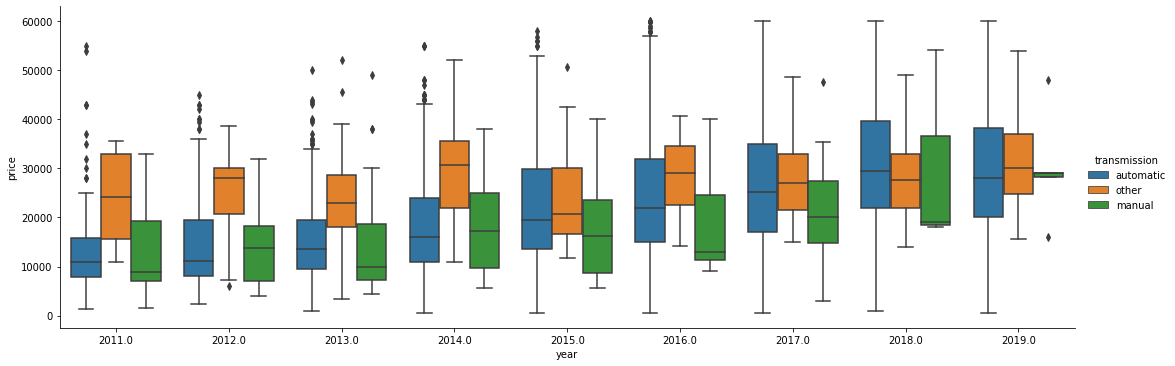

In [6]:
# sb.histplot(data=filtered_year, x="year", hue="transmission", multiple="dodge", shrink=2)

sb.catplot(x="year", y="price", hue="transmission", kind="box", data=filtered_year, height=5, aspect=3)

In [ ]:
sb.catplot(x="year", y="price", hue="fuel", kind="box", data=filtered_year, height=5, aspect=3)

In [ ]:
sb.catplot(x="year", y="price", hue="title_status", kind="box", data=filtered_year, height=5, aspect=3)

In [ ]:
sb.catplot(x="year", y="price", hue="type", kind="box", data=type_data, height=5, aspect=3)

In [ ]:
sb.catplot(x="year", y="price", hue="drive", kind="box", data=filtered_year, height=5, aspect=3)

In [ ]:
# sb.catplot(x="price", y="manufacturer", hue="manufacturer", kind="box", data=type_data, height=10, aspect=2, notch=True)
fig = plt.figure(figsize=(13,18))
ax = fig.gca()
sb.boxplot(x = 'price', y = 'manufacturer', data = filtered_year)

In [ ]:
df["cylinders"].replace({"12 cylinders": "12", "10 cylinders": "10", "8 cylinders": "8", "6 cylinders": "6", 
                         "5 cylinders": "5", "4 cylinders": "4", "3 cylinders": "3", "other": "0"}, inplace=True)

df["condition"].replace({"new": "10", "like new": "8", "excellent": "6", "good": "4", "fair": "2", 
                         "salvage": "-5", "parts only": "-10"}, inplace=True)

df["fuel"].replace({"diesel": "10", "other": "5", "gas": "5", "hybrid": "1", "electric": "7"}, inplace=True)

df["title_status"].replace({"clean": "9", "rebuilt": "5", "lien": "10", "salvage": "2", "missing": "0",
                            "parts only": "1"}, inplace=True)

df["transmission"].replace({"automatic": "10", "other": "8", "manual": "6"}, inplace=True)

df["type"].replace({"pickup": "0.75", "sedan": "0.5", "truck": "0.75", "other": "0", "hybrid": "0.5", 
                    "electric": "1", "parts only": "-3", "coupe": "1", "mini-van": "0.8", "SUV": "0.8", 
                    "hatchback": "0.3", "offroad": "0.5", "van": "0.7", "convertible": "0.8", "wagon": "0.5", 
                    "bus": "1"}, inplace=True)

df["drive"].replace({"rwd": "8", "4wd": "10", "fwd": "4"}, inplace=True)

df.drop('size', inplace=True, axis=1)

df.fillna("0", inplace=True)

# RECONSIDER THIS FOR MORE DATA
df.dropna(subset = ["odometer", "condition", "cylinders"], inplace=True)
# --------------

# One-Hot encoding the manufacturers
y = pd.get_dummies(df.manufacturer, prefix='man')

df.drop('manufacturer', inplace=True, axis=1)

df = pd.concat([df, y], axis=1)




## Normalizing the Data

---

In [ ]:
# year_zscore = stats.zscore(df['year'])
# odometer_zscore = stats.zscore(df['odometer'])

# df['year_zscore'] = year_zscore
# df['odometer_zscore'] = odometer_zscore

# df.drop('year', inplace = True, axis = 1)
# df.drop('odometer', inplace = True, axis = 1)

</br>

## Regression

---

#### Models to Test:
1. Random Forest
2. Logistic Regression
3. K-Nearest Regressor
4. XGBoost

### 1. Random Forest



In [ ]:
Y = df['price']

df.drop('price', inplace=True, axis=1)

In [ ]:
# NEED TO COLLECT SOME ADDITIONAL INFORMATION FOR TESTING

X_train, X_test, y_train, y_test = train_test_split(df, Y, train_size=0.999, test_size=0.001, random_state=42)

RFR_model = RandomForestRegressor(bootstrap=True, max_features=0.75, min_samples_leaf=2, min_samples_split=6, n_estimators=100, random_state = 42)
# RFR_model = RandomForestRegressor(bootstrap=True, max_features=0.15000000000000002, min_samples_leaf=2, min_samples_split=19, n_estimators=100)

RFR_model.fit(X_train, y_train)

results = RFR_model.predict(X_test)

In [ ]:
# results = RFR_model.predict(X_test)

test = y_test.to_numpy()

print(sklearn.metrics.mean_squared_error(test, results, sample_weight=None, multioutput='uniform_average', squared=False))
print(sklearn.metrics.mean_absolute_error(test, results, sample_weight=None, multioutput='uniform_average'))
print(sklearn.metrics.r2_score(test, results, sample_weight=None, multioutput='uniform_average'))

In [ ]:
df

In [ ]:
y_test.to_numpy()

In [ ]:
results

In [ ]:
from sklearn.model_selection import train_test_split

from tpot import TPOTClassifier, TPOTRegressor

tpot = TPOTRegressor(generations=2, population_size=50, verbosity=2, random_state=42)

df = df.sample(10000)

Y = df['price']
df.drop('price', inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, Y, train_size=0.999, test_size=0.001, random_state=42)

tpot.fit(X_train, y_train)

In [ ]:
tpot.export('temp.py')